# This notebook is my practise book. I have written the below code, based on the teaching from Daniel Mbourke's course - "TensorFlow Developer Certificate in 2023 - 64 hours course"

https://zerotomastery.io/courses/learn-tensorflow/

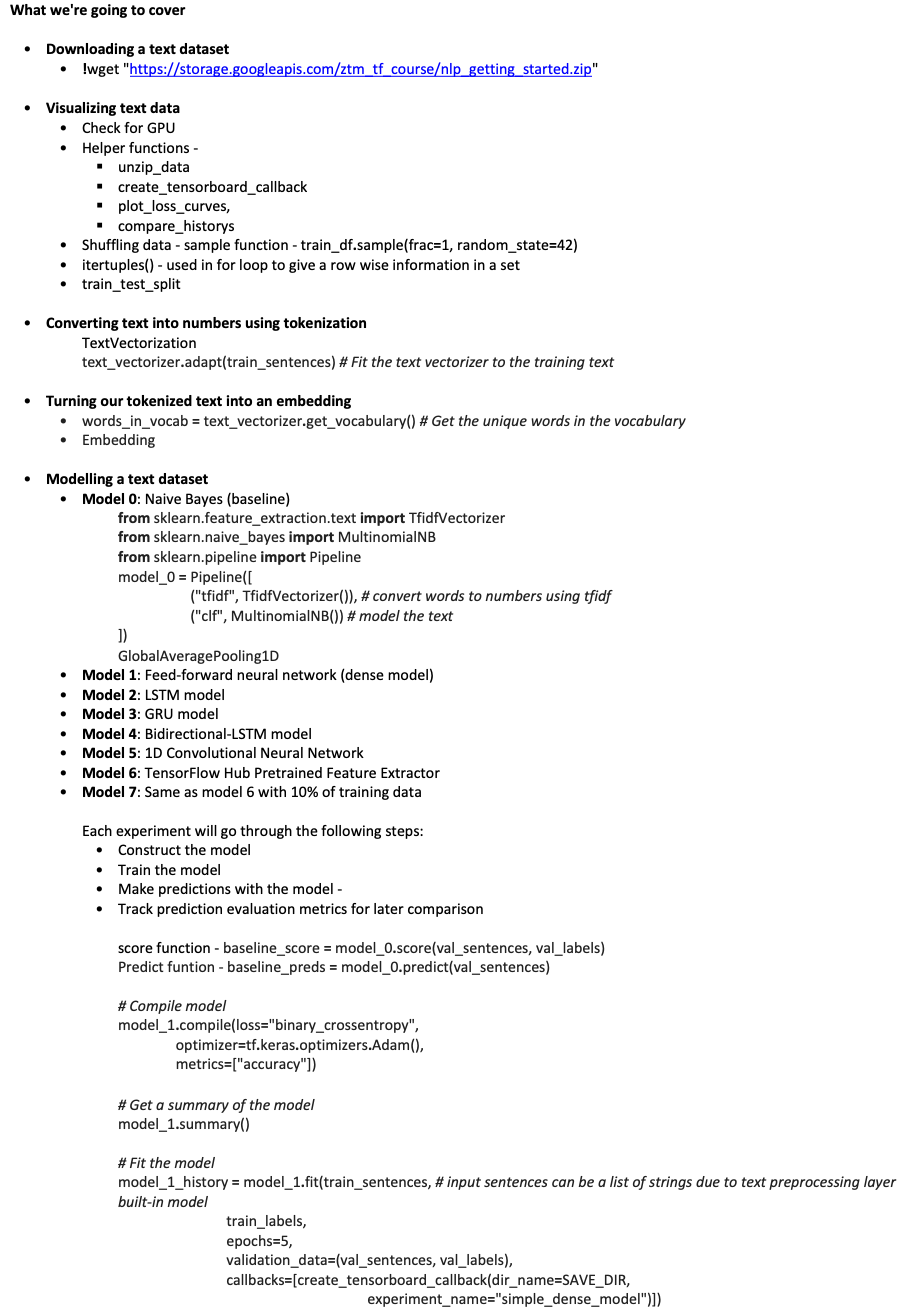

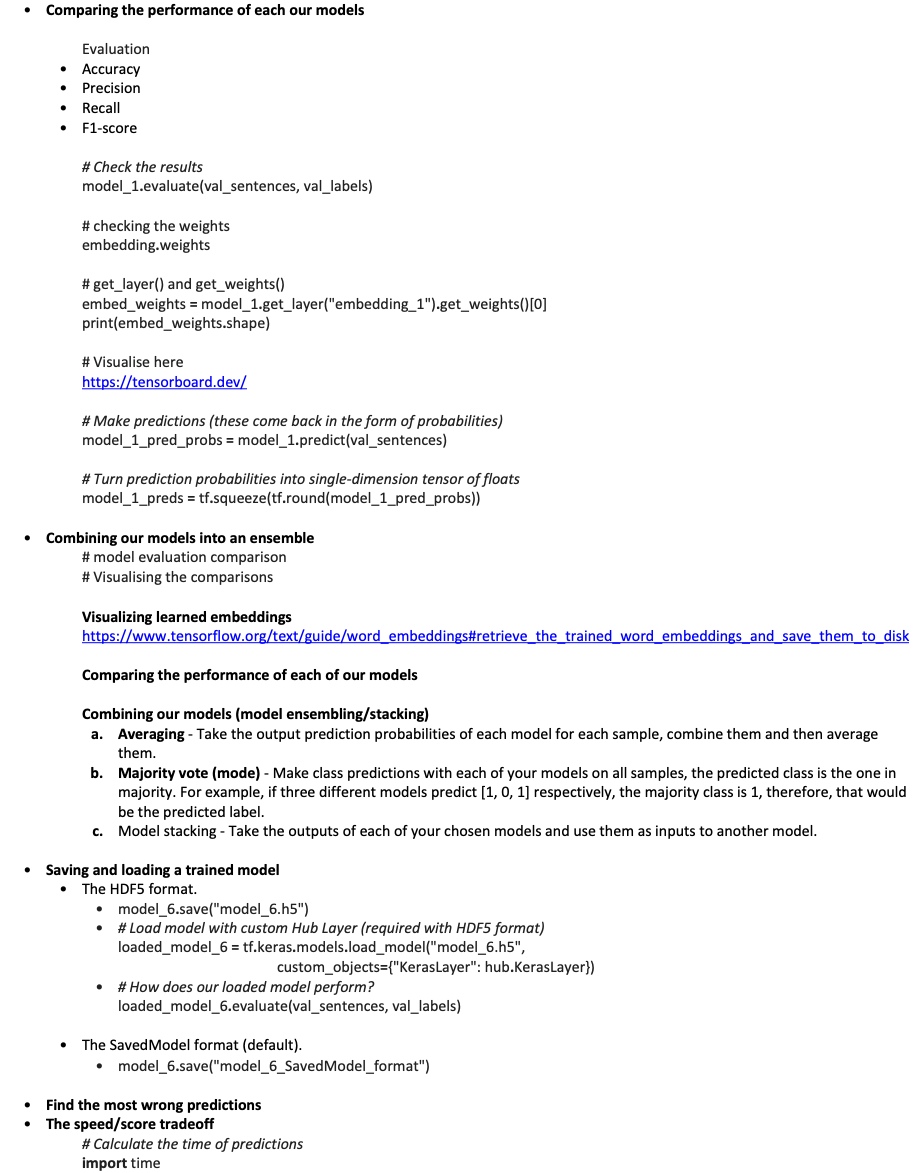

In [1]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
# Helper functions

# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

In [3]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [4]:
# Make a function to predict on images and plot them (works with multi-class)
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  

In [5]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Plot the validation and training data separately
import matplotlib.pyplot as plt


In [6]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [7]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [8]:
# Create function to unzip a zipfile into current working directory 
# (since we're going to be downloading and unzipping a few files)
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.
  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [9]:
# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [10]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [11]:
!nvidia-smi

Wed Apr 19 14:44:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-abaf3de7-da58-b982-5b3e-61f2d196f176)


# Getting the text dataset

In [13]:
# Getting th text dataset
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip
unzip_data("nlp_getting_started.zip")

--2023-04-19 14:44:44--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-04-19 14:44:44 (121 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# Becoming one with the data

In [14]:
# Visualising the text dataset
# The data is about disaster finding using twitter comments

import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [15]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [16]:
train_df.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [17]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [18]:
test_df.count()

id          3263
keyword     3237
location    2158
text        3263
dtype: int64

In [19]:
# Shuffling the data
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [20]:
# How our target is split
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [21]:
4342/(4342+3271)

0.5703402075397347

In [22]:
# 57% - 0
# 43% - 1

# pretty balanced

In [23]:
len(train_df), len(test_df)

(7613, 3263)

In [24]:
import random
random_index = random.randint(0, len(train_df)-5)

for row in train_df_shuffled[["text","target"]][random_index:random_index + 5].itertuples():
  _, text, target = row
  print(f"Target : {target}", "(real disaster)"if target > 0 else "(not real disaster)")
  print(f"Text: {text}\n")
  print("------------\n")

Target : 0 (not real disaster)
Text: #Kick Hendrixonfire  @'=BLACKCATS= | BIG NOOB CONQUEST | MIXED MAPS | ALL WEAPONS' for violated K/DR  Limit /Server  max 3

------------

Target : 0 (not real disaster)
Text: @brookesddl I am traumatised the lil shit nearly hopped in the bloody shower with me

------------

Target : 1 (real disaster)
Text: Aircraft debris found on island is from MH370 Malaysia confirms http://t.co/X3RccHKagO

------------

Target : 1 (real disaster)
Text: This is one violent and belligerent storm. I'm enjoying watching it unfold

------------

Target : 1 (real disaster)
Text: Metal Cutting Sparks Brush Fire In Brighton: A brush fire that was sparked by a landowner cutting metal burned 10Û_ http://t.co/rj7m42AtWS

------------



# Train test split

In [25]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)

len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [26]:
 train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

# Need to convert the text to numbers

# Tokenization


In [27]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorize = TextVectorization(
                                  max_tokens = None,
                                  standardize = 'lower_and_strip_punctuation',
                                  split = 'whitespace',
                                  output_mode = 'int',
                                  output_sequence_length = None,
                                  pad_to_max_tokens = False
)

In [29]:
x = train_sentences[0].split()
x

['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet']

In [30]:
len(x)

7

In [31]:
listy = [len(i.split()) for i in train_sentences]
words = sum(listy)

words


102087

In [32]:
max_vocab_length = 10000
max_length = 13 # average

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [33]:
text_vectorizer.adapt(train_sentences)

In [34]:
sample_sentence = "My name is khan"
sample_sentence2 = "My name is khan"

text_vectorizer([sample_sentence, sample_sentence2])


<tf.Tensor: shape=(2, 13), dtype=int64, numpy=
array([[ 13, 735,   9,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 13, 735,   9,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0]])>

In [35]:
random_sen = random.choice(train_sentences)
print(f"Original sentence : \n\n{random_sen} \n\nvectorised version : \n")
text_vectorizer([random_sen])

Original sentence : 

Why did God order obliteration of ancient Canaanites? http://t.co/Sf2vwQvJYa 

vectorised version : 



<tf.Tensor: shape=(1, 13), dtype=int64, numpy=
array([[  91,  145,  200,  732,  536,    6, 1045, 1886,    1,    0,    0,
           0,    0]])>

In [36]:
unique_words = text_vectorizer.get_vocabulary()
len(unique_words)


10000

In [37]:
#Top 5 unique 
unique_words[:5]

['', '[UNK]', 'the', 'a', 'in']

In [38]:
#Last 5 unique
unique_words[-5:]

['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']

# Embedding

In [39]:
tf.random.set_seed(42)
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim = max_vocab_length,
                      output_dim = 128,
                      embeddings_initializer = "uniform",
                      input_length = max_length,
                      name = "embedding_1")
embedding

In [40]:
random_sentence = random.choice(train_sentences)
print(f"Original text :\n {random_sentence}\n\nEMbedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text :
 HEY LOOK!!!  Kash's Foundation Live for Today got blown up on People Magazine's website!!  

Todd Blake... http://t.co/2Fenu1SYu6

EMbedded version:


<tf.Tensor: shape=(1, 13, 128), dtype=float32, numpy=
array([[[ 0.0318916 ,  0.04822602,  0.01857331, ...,  0.01735659,
          0.00147235,  0.04133176],
        [ 0.00366611,  0.02076079, -0.00432038, ..., -0.01144303,
          0.03973948,  0.00461574],
        [-0.02371943, -0.03102181, -0.03590348, ..., -0.01224226,
         -0.03265178, -0.01788991],
        ...,
        [ 0.02995055,  0.02314272, -0.00563174, ...,  0.01124058,
          0.00572132,  0.00364261],
        [ 0.0444255 , -0.01312165,  0.03106428, ...,  0.04847615,
         -0.0452683 , -0.0288582 ],
        [-0.02371943, -0.03102181, -0.03590348, ..., -0.01224226,
         -0.03265178, -0.01788991]]], dtype=float32)>

In [41]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.0318916 ,  0.04822602,  0.01857331,  0.04110401,  0.00944684,
        0.02822108, -0.00937036,  0.04048796, -0.00961983,  0.04679963,
        0.02114351, -0.03161359,  0.01113041, -0.04499153,  0.01064489,
        0.00621946,  0.00175817, -0.02859659,  0.04016532,  0.00126443,
        0.04169227,  0.04605844, -0.0311713 , -0.04629287,  0.00445288,
       -0.01427859, -0.03790233,  0.00605851, -0.00957668,  0.03410472,
       -0.00269722,  0.01746971,  0.03696216,  0.00600526, -0.04928857,
        0.00900179,  0.04452975,  0.03704745,  0.01846926, -0.03554184,
       -0.00415774, -0.0059726 ,  0.01120938, -0.02877052, -0.04545012,
        0.01691363, -0.01024102, -0.024699  ,  0.01909976, -0.00879963,
        0.0066928 , -0.00018287,  0.0001419 , -0.04848032,  0.02277767,
       -0.04754415,  0.00972835, -0.01623522,  0.0301534 , -0.02741803,
        0.01445309, -0.03169571, -0.03117148, -0.01280566,  0.00873566,
       -0.007340

# Model 1

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [43]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"accuracy is {baseline_score * 100 :.2f}%")

accuracy is 79.27%


In [44]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [45]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = "weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall":model_recall,
                   "f1 score": model_f1}
  return model_results

In [46]:
baseline_results = calculate_results(y_true = val_labels, y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1 score': 0.7862189758049549}

In [47]:
SAVE_DIR = "model_logs"

# Building model with functional API

In [48]:
from tensorflow.keras import layers
import tensorflow.keras
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)

outputs = layers.Dense(1,activation = "sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")


model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 13)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 13, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [49]:
model_1.history = model_1.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230419-144455
Epoch 1/5
215/215 [==============================] - 26s 85ms/step - loss: 0.6059 - accuracy: 0.7076 - val_loss: 0.5305 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.4387 - accuracy: 0.8224 - val_loss: 0.4695 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.3456 - accuracy: 0.8622 - val_loss: 0.4614 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2846 - accuracy: 0.8913 - val_loss: 0.4672 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2378 - accuracy: 0.9133 - val_loss: 0.4842 - val_accuracy: 0.7822


In [50]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.4842 - accuracy: 0.7822


[0.4841935634613037, 0.7821522355079651]

In [51]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.01282395,  0.00445251, -0.05317908, ..., -0.00014436,
         -0.02042699,  0.02215812],
        [-0.01831511, -0.02418254, -0.04365027, ..., -0.00417069,
         -0.03963709, -0.01027426],
        [ 0.00902612,  0.00503353,  0.00191218, ...,  0.02574018,
          0.02401997, -0.03379717],
        ...,
        [-0.02192198,  0.00241147, -0.04961717, ...,  0.02433578,
         -0.039322  , -0.01056344],
        [ 0.0509733 ,  0.00323926, -0.04812634, ...,  0.01100501,
         -0.09634359,  0.02544155],
        [ 0.08490174,  0.01733566, -0.04096249, ...,  0.11109374,
         -0.09667847,  0.05659229]], dtype=float32)>]

In [52]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [53]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.44710705],
       [0.78263587],
       [0.998195  ],
       [0.1114757 ],
       [0.04671069],
       [0.9450345 ],
       [0.90026927],
       [0.98972976],
       [0.98195994],
       [0.1029268 ]], dtype=float32)

In [54]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [55]:
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 78.21522309711287,
 'precision': 0.7840694582051416,
 'recall': 0.7821522309711286,
 'f1 score': 0.7801766074787211}

In [56]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [57]:
def compare_basline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key} : {new_model_results[key]:.2f}, Difference : {new_model_results[key] - value:.2f}")

compare_basline_to_new_results(baseline_results, model_1_results)

Baseline accuracy: 79.27, New accuracy : 78.22, Difference : -1.05
Baseline precision: 0.81, New precision : 0.78, Difference : -0.03
Baseline recall: 0.79, New recall : 0.78, Difference : -0.01
Baseline f1 score: 0.79, New f1 score : 0.78, Difference : -0.01


In [58]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [59]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 13)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 13, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [60]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


# RNN - LSTM

In [61]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer = "uniform",
                                     input_length = max_length,
                                     name = "embedding_2")

inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)

x = layers.LSTM(64)(x)
print(x.shape)

outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "mode_2_LSTM")

(None, 13, 128)
(None, 64)


In [62]:
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [63]:
model_2.summary()

Model: "mode_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 13)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 13, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_____________________________________________

In [64]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230419-144620
Epoch 1/5
215/215 [==============================] - 19s 71ms/step - loss: 0.5110 - accuracy: 0.7453 - val_loss: 0.4604 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3203 - accuracy: 0.8713 - val_loss: 0.5125 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2235 - accuracy: 0.9153 - val_loss: 0.6055 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1639 - accuracy: 0.9422 - val_loss: 0.6564 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1171 - accuracy: 0.9559 - val_loss: 0.7730 - val_accuracy: 0.7546


In [65]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


((762, 1),
 array([[0.03067481],
        [0.8740119 ],
        [0.9995788 ],
        [0.06097387],
        [0.00181956],
        [0.99931955],
        [0.79906285],
        [0.9997131 ],
        [0.9994281 ],
        [0.0516102 ]], dtype=float32))

In [66]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [67]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 75.45931758530183,
 'precision': 0.7559031285141217,
 'recall': 0.7545931758530183,
 'f1 score': 0.7522980305427924}

In [68]:
compare_basline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy : 75.46, Difference : -3.81
Baseline precision: 0.81, New precision : 0.76, Difference : -0.06
Baseline recall: 0.79, New recall : 0.75, Difference : -0.04
Baseline f1 score: 0.79, New f1 score : 0.75, Difference : -0.03


# GRU

In [69]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer = "uniform",
                                     input_length = max_length,
                                     name = "embedding_3")

inputs = layers.Input(shape =(1,), dtype = "string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)

outputs = layers.Dense(1,activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

In [70]:
model_3.compile(loss = "binary_crossentropy",
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [71]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 13)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 13, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [72]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230419-144705
Epoch 1/5
215/215 [==============================] - 22s 74ms/step - loss: 0.5237 - accuracy: 0.7313 - val_loss: 0.4577 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3231 - accuracy: 0.8692 - val_loss: 0.4885 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.2202 - accuracy: 0.9150 - val_loss: 0.5850 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1566 - accuracy: 0.9457 - val_loss: 0.6361 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1131 - accuracy: 0.9620 - val_loss: 0.6667 - val_accuracy: 0.7533


In [73]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.6119142 ],
        [0.8863407 ],
        [0.99921465],
        [0.15662879],
        [0.00361251],
        [0.99542916],
        [0.850136  ],
        [0.99601364],
        [0.9982309 ],
        [0.03854609]], dtype=float32))

In [74]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [75]:
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 75.32808398950131,
 'precision': 0.7529952160130181,
 'recall': 0.7532808398950132,
 'f1 score': 0.7522494297950951}

In [76]:
# Compare to baseline
compare_basline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy : 75.33, Difference : -3.94
Baseline precision: 0.81, New precision : 0.75, Difference : -0.06
Baseline recall: 0.79, New recall : 0.75, Difference : -0.04
Baseline f1 score: 0.79, New f1 score : 0.75, Difference : -0.03


# Model 4: Bidirectonal RNN model

In [77]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [78]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [79]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 13)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 13, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [80]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20230419-144752
Epoch 1/5
215/215 [==============================] - 17s 59ms/step - loss: 0.5135 - accuracy: 0.7437 - val_loss: 0.4609 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3187 - accuracy: 0.8686 - val_loss: 0.5014 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2137 - accuracy: 0.9194 - val_loss: 0.6191 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1475 - accuracy: 0.9492 - val_loss: 0.6373 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1033 - accuracy: 0.9656 - val_loss: 0.8074 - val_accuracy: 0.7493


In [81]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 2s 3ms/step


array([[0.01604294],
       [0.7661021 ],
       [0.9994917 ],
       [0.11028755],
       [0.00126125],
       [0.9948478 ],
       [0.5565705 ],
       [0.9991774 ],
       [0.99955183],
       [0.06270903]], dtype=float32)

In [82]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [83]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 74.93438320209974,
 'precision': 0.7492247249620504,
 'recall': 0.7493438320209974,
 'f1 score': 0.748024369633166}

In [84]:
compare_basline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy : 74.93, Difference : -4.33
Baseline precision: 0.81, New precision : 0.75, Difference : -0.06
Baseline recall: 0.79, New recall : 0.75, Difference : -0.04
Baseline f1 score: 0.79, New f1 score : 0.75, Difference : -0.04


# Model 5: Conv1D - Convolutional Neural Networks for Text

In [85]:

embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 13, 128]), TensorShape([1, 9, 32]), TensorShape([1, 32]))

In [86]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 13, 128), dtype=float32, numpy=
 array([[[-0.04956625,  0.04208879, -0.00473151, ..., -0.00049726,
          -0.03582173, -0.03805071],
         [ 0.05077079,  0.02698644, -0.03617687, ...,  0.00559762,
          -0.07379768,  0.03454361],
         [ 0.0442723 ,  0.02217155, -0.03665511, ..., -0.0306814 ,
          -0.01709196,  0.00398653],
         ...,
         [ 0.01282395,  0.00445251, -0.05317908, ..., -0.00014436,
          -0.02042699,  0.02215812],
         [ 0.01282395,  0.00445251, -0.05317908, ..., -0.00014436,
          -0.02042699,  0.02215812],
         [ 0.01282395,  0.00445251, -0.05317908, ..., -0.00014436,
          -0.02042699,  0.02215812]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 9, 32), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.        , 0.03806209, 0.00035947,
          0.08269851, 0.01497898, 0.        , 0.        , 0.03805409,
          0.05445636, 0.02942762, 0.00947069, 0.        , 0.09261685,
          0.08878429, 0. 

In [87]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 13)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 13, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 32)             20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [88]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230419-144842
Epoch 1/5
215/215 [==============================] - 23s 92ms/step - loss: 0.5676 - accuracy: 0.7139 - val_loss: 0.4797 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3485 - accuracy: 0.8537 - val_loss: 0.4849 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2204 - accuracy: 0.9155 - val_loss: 0.5444 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1436 - accuracy: 0.9517 - val_loss: 0.6129 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1010 - accuracy: 0.9657 - val_loss: 0.6773 - val_accuracy: 0.7703


In [89]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[0.40020487],
       [0.6584685 ],
       [0.99978334],
       [0.03769216],
       [0.01726524],
       [0.9984542 ],
       [0.9335576 ],
       [0.9976228 ],
       [0.9981286 ],
       [0.06107718]], dtype=float32)

In [90]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [91]:
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 77.03412073490814,
 'precision': 0.7739543961790544,
 'recall': 0.7703412073490814,
 'f1 score': 0.7673435495786338}

In [92]:
compare_basline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy : 77.03, Difference : -2.23
Baseline precision: 0.81, New precision : 0.77, Difference : -0.04
Baseline recall: 0.79, New recall : 0.77, Difference : -0.02
Baseline f1 score: 0.79, New f1 score : 0.77, Difference : -0.02


# Using Pretrained Embeddings (transfer learning for NLP)
# Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [93]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence, "when you can life weights, lift it"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.00972064 -0.07186073  0.01771226  0.0051037   0.05516994  0.05444243
 -0.00628945 -0.036799    0.05522959 -0.03296493  0.05368752  0.04206051
  0.02887261  0.05877378  0.05104619 -0.06887517  0.0562175  -0.02042784
  0.06837401 -0.02349004 -0.03202728  0.01386608  0.00566283  0.05107323
  0.01971554 -0.02283731  0.05616427 -0.03301486  0.00670056 -0.02535082
  0.05064634 -0.03494585 -0.0165932   0.0385284   0.02255284 -0.07286822
 -0.00887561 -0.01591385 -0.07185941  0.01360218 -0.04460865 -0.02038431
 -0.01487631  0.03526501 -0.00616294  0.02244341 -0.05999054  0.00849282
  0.04790575 -0.03692268], shape=(50,), dtype=float32)


In [94]:
embed_samples[0].shape

TensorShape([512])

In [95]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE")

In [96]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
], name = "model_6_USE")

model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [97]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230419-144959
Epoch 1/5
215/215 [==============================] - 8s 18ms/step - loss: 0.5061 - accuracy: 0.7848 - val_loss: 0.4481 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4150 - accuracy: 0.8140 - val_loss: 0.4373 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4004 - accuracy: 0.8210 - val_loss: 0.4329 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3934 - accuracy: 0.8262 - val_loss: 0.4283 - val_accuracy: 0.8189
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3876 - accuracy: 0.8285 - val_loss: 0.4296 - val_accuracy: 0.8189


In [98]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[0.1558121 ],
       [0.75399464],
       [0.9862634 ],
       [0.20185192],
       [0.7498923 ],
       [0.6799381 ],
       [0.98145914],
       [0.97555155],
       [0.92348135],
       [0.08822862]], dtype=float32)

In [99]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [100]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.88976377952756,
 'precision': 0.8211302341077333,
 'recall': 0.8188976377952756,
 'f1 score': 0.817453860659066}

In [101]:
compare_basline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy : 81.89, Difference : 2.62
Baseline precision: 0.81, New precision : 0.82, Difference : 0.01
Baseline recall: 0.79, New recall : 0.82, Difference : 0.03
Baseline f1 score: 0.79, New f1 score : 0.82, Difference : 0.03


# Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [102]:

train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [103]:
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [104]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [105]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [106]:
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20230419-145050
Epoch 1/5
22/22 [==============================] - 6s 59ms/step - loss: 0.6728 - accuracy: 0.6749 - val_loss: 0.6548 - val_accuracy: 0.6916
Epoch 2/5
22/22 [==============================] - 1s 51ms/step - loss: 0.6053 - accuracy: 0.7974 - val_loss: 0.5998 - val_accuracy: 0.7467
Epoch 3/5
22/22 [==============================] - 1s 48ms/step - loss: 0.5295 - accuracy: 0.8163 - val_loss: 0.5448 - val_accuracy: 0.7625
Epoch 4/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4630 - accuracy: 0.8353 - val_loss: 0.5103 - val_accuracy: 0.7690
Epoch 5/5
22/22 [==============================] - 1s 37ms/step - loss: 0.4173 - accuracy: 0.8411 - val_loss: 0.4916 - val_accuracy: 0.7769


In [107]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 3s 22ms/step


array([[0.27153224],
       [0.77782243],
       [0.8857414 ],
       [0.2911598 ],
       [0.55479944],
       [0.8531037 ],
       [0.8122649 ],
       [0.84643954],
       [0.8227548 ],
       [0.12930843]], dtype=float32)

In [108]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [109]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 77.69028871391076,
 'precision': 0.7813687007758338,
 'recall': 0.7769028871391076,
 'f1 score': 0.7737651515426378}

In [110]:
compare_basline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy : 77.69, Difference : -1.57
Baseline precision: 0.81, New precision : 0.78, Difference : -0.03
Baseline recall: 0.79, New recall : 0.78, Difference : -0.02
Baseline f1 score: 0.79, New f1 score : 0.77, Difference : -0.01


# Comparing the performance of each of our models

In [111]:
all_model_results = pd.DataFrame({
                                  "baseline" : baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results
})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1 score
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.215223,0.784069,0.782152,0.780177
lstm,75.459318,0.755903,0.754593,0.752298
gru,75.328084,0.752995,0.753281,0.752249
bidirectional,74.934383,0.749225,0.749344,0.748024
conv1d,77.034121,0.773954,0.770341,0.767344
tf_hub_sentence_encoder,81.889764,0.821130,0.818898,0.817454
tf_hub_10_percent_data,77.690289,0.781369,0.776903,0.773765


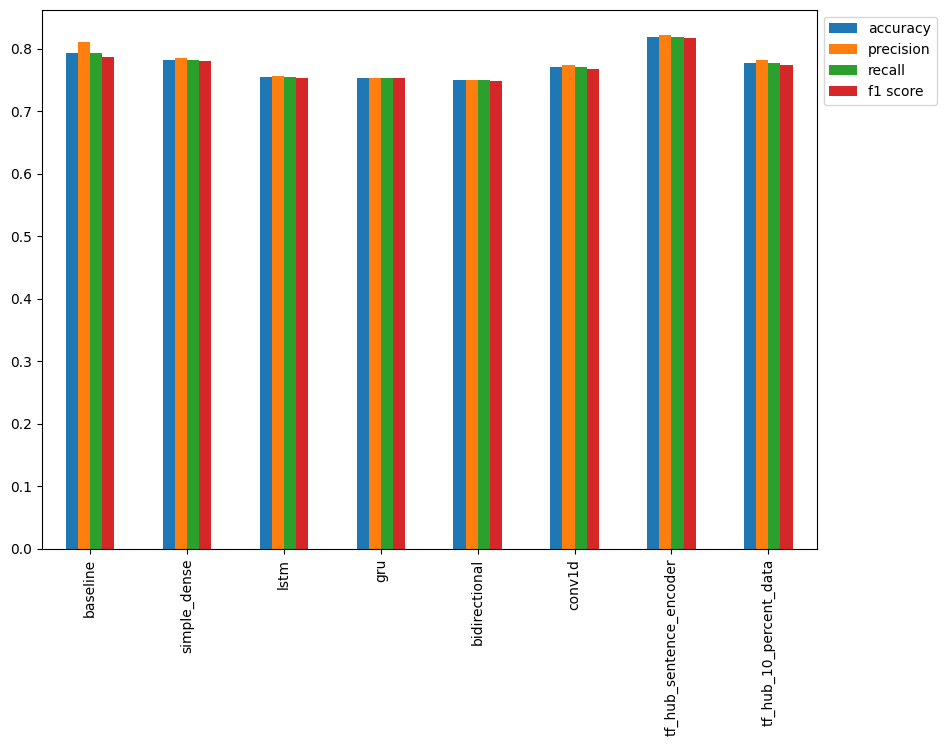

In [112]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results.plot(kind = "bar", figsize = (10,7)).legend(bbox_to_anchor= (1.0, 1.0));

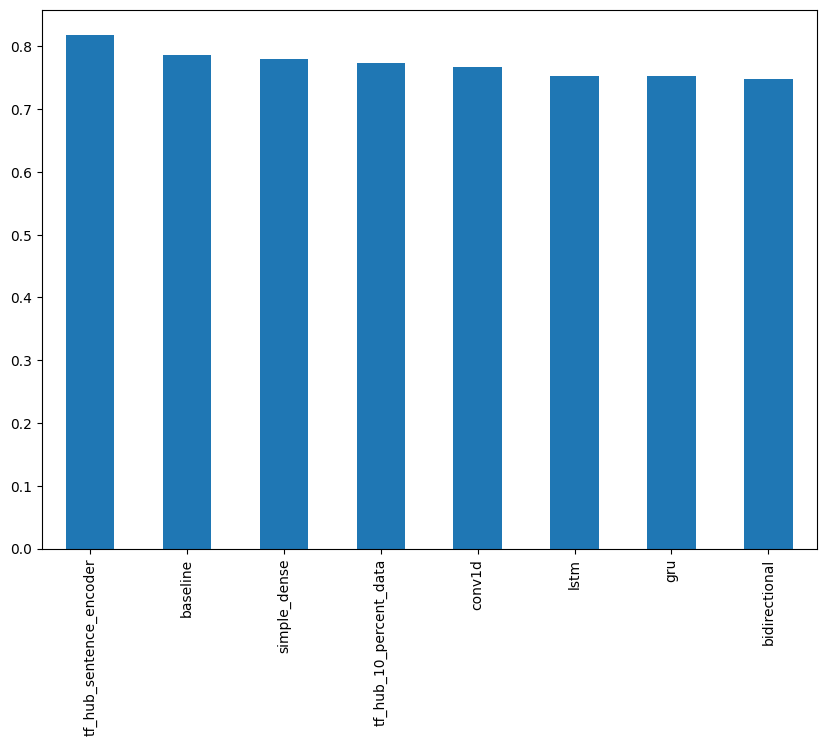

In [113]:
# Sort model results by f1-score
all_model_results.sort_values("f1 score", ascending=False)["f1 score"].plot(kind="bar", figsize=(10, 7));

# Combining our models (model ensembling/stacking)

In [115]:
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis =1)
combined_pred_probs = baseline_pred_probs + np.squeeze(model_2_pred_probs, axis = 1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1.], dtype=float32)>

In [116]:
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 77.95275590551181,
 'precision': 0.7792465794019963,
 'recall': 0.7795275590551181,
 'f1 score': 0.7793006345999338}

In [121]:
all_model_results.loc["ensemble_results"] = ensemble_results

In [122]:
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1 score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.782152,0.784069,0.782152,0.780177
lstm,0.754593,0.755903,0.754593,0.752298
gru,0.753281,0.752995,0.753281,0.752249
bidirectional,0.749344,0.749225,0.749344,0.748024
conv1d,0.770341,0.773954,0.770341,0.767344
tf_hub_sentence_encoder,0.818898,0.821130,0.818898,0.817454
tf_hub_10_percent_data,0.776903,0.781369,0.776903,0.773765
ensemble_results,0.779528,0.779247,0.779528,0.779301


# Saving and loading the model


In [123]:
model_6.save("model_6.h5")

In [126]:
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects = {"KerasLayer" : hub.KerasLayer})

In [127]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 17ms/step - loss: 0.4296 - accuracy: 0.8189


[0.42964547872543335, 0.8188976645469666]

In [128]:
model_6.save("model_6")

In [129]:
loaded_model_6_2 = tf.keras.models.load_model("model_6")

In [130]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 14ms/step - loss: 0.4296 - accuracy: 0.8189


[0.4296455383300781, 0.8188976645469666]

# Finding the most wrong examples

In [131]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target" : val_labels,
                       "pred" : model_6_preds,
                       "pred_probs": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.155812
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.753995
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.986263
3,@camilacabello97 Internally and externally scr...,1,0.0,0.201852
4,Radiation emergency #preparedness starts with ...,1,1.0,0.749892


In [133]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_probs", ascending = False)
most_wrong[:10]

,text,target,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.913977
759,FedEx will no longer transport bioterror patho...,0,1.0,0.860705
628,@noah_anyname That's where the concentration c...,0,1.0,0.854795
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.837471
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.836961
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.817917
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.790186
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.783811
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.773224
695,A look at state actions a year after Ferguson'...,0,1.0,0.768571


In [134]:
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_probs = row
  print(f"Target : {target}, Pred : {int(pred)}, prob : {pred_probs}")
  print(f"text : \n\n {text}")
  print("--------------------")


Target : 0, Pred : 1, prob : 0.9139773845672607
text : 

 ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying
--------------------
Target : 0, Pred : 1, prob : 0.860704779624939
text : 

 FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J
--------------------
Target : 0, Pred : 1, prob : 0.8547954559326172
text : 

 @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.
--------------------
Target : 0, Pred : 1, prob : 0.8374707698822021
text : 

 @SonofLiberty357 all illuminated by the brightly burning buildings all around the town!
--------------------
Target : 0, Pred : 1, prob : 0.8369609117507935
text : 

 @madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods
--------------------
Target : 0, Pred : 1, prob : 0.817916989326477
text : 

 Ashes 2015: AustraliaÛªs collapse at Trent Bridge among w

In [135]:
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 0.061070267111063004
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0, Prob: 0.05415777489542961
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.05405798926949501
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.05253731086850166
Text:
@BoyInAHorsemask its a panda trapped in a dogs body

----

Target: 1, Pred: 0, Prob: 0.05108169838786125
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.045996326953172684
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.03863460570573807
Text:
Reddit Will Now QuarantineÛ_ http://t

In [136]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 81ms/step
Pred: 1, Prob: 0.598019540309906
Text:
The U.S. will experience an economic meltdown similar to the early 2000s mortgage shit show due to student loans. You heard it here first ????

----

1/1 [==============================] - 0s 120ms/step
Pred: 0, Prob: 0.11077296733856201
Text:
.@janeannmorrison: A former Assembly candidate is still waiting for answers http://t.co/Mm5z32vKPC

----

1/1 [==============================] - 0s 157ms/step
Pred: 0, Prob: 0.1835816502571106
Text:
'I must not fear. Fear is the mind-killer. Fear is the little-death that brings total obliteration... http://t.co/oERI3uWnRY

----

1/1 [==============================] - 0s 88ms/step
Pred: 1, Prob: 0.9030661582946777
Text:
Chemical spill at a house in Hammondville. Emergency services attending. #BreakingNews #7News http://t.co/bQ94MjYgfe

----

1/1 [==============================] - 0s 65ms/step
Pred: 0, Prob: 0.09195244312286377
Text:
8' MTech Assisted Open RE

# Predicting on Tweets from the wild

In [137]:
# Turn Tweet into string
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

In [138]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [139]:
predict_on_sentence(model=model_6, # use the USE model
                    sentence=daniels_tweet)

1/1 [==============================] - 0s 66ms/step
Pred: 0.0 (not real disaster) Prob: 0.05049699544906616
Text:
Life like an ensemble: take the best choices from others and make your own


# The speed/score tradeoff

In [141]:
import time
def pred_timer(model, samples):
  start_time = time.perf_counter()

  model.predict(samples)

  end_time = time.perf_counter()

  total_time = end_time - start_time
  time_per_pred = total_time / len(samples)
  return total_time, time_per_pred

In [142]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 13ms/step


(0.39522038300015083, 0.0005186619199477045)

In [152]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.018159655000090424, 2.3831568241588484e-05)

In [153]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1 score': 0.7862189758049549}

Text(0, 0.5, 'F1 - score')

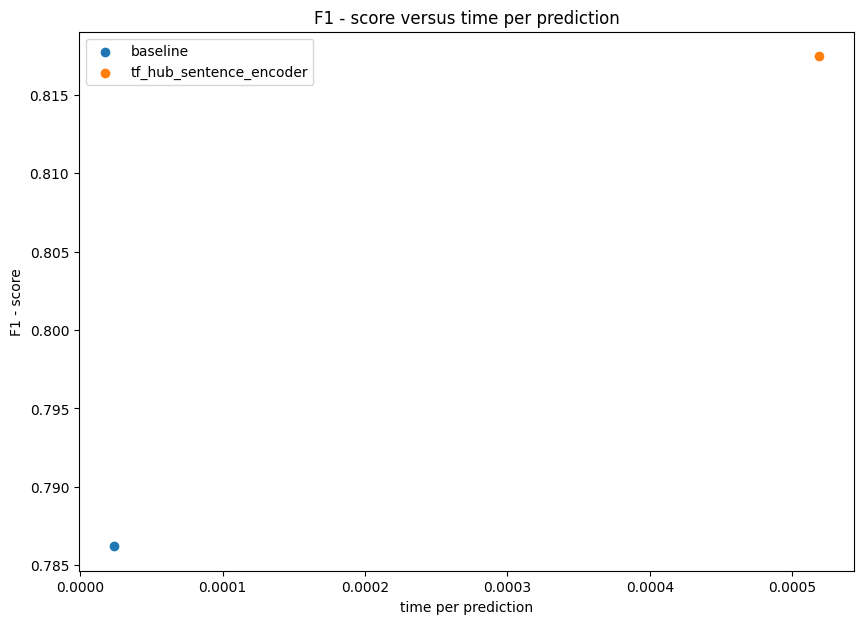

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
plt.scatter(baseline_time_per_pred, baseline_results["f1 score"], label = "baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1 score"], label = "tf_hub_sentence_encoder")
plt.legend()
plt.title("F1 - score versus time per prediction")
plt.xlabel("time per prediction")
plt.ylabel("F1 - score")